#Project Title: Recommendation System for Perfume 

###Abstract
Fragrance is not only about scent, it tells your personality, or the impression you want to leave on people. Every person has a different taste and will like distinct scents. So, this is what I’m doing to find and recommend the flawless perfume that matches one’s choice.

###Objective
Build a recommendation system that helps the customers to find perfumes that corresponds to their personality.

###Details of the Data
Initially I searched a lot for a dataset but could not find any that matched the features I wanted. So, the best option I found was to web-scrape a fragrance website and get the data. The website I chose for this is  https://www.fragrancenet.com/ni/fragrances?f=1f!3D/1f!6. 

The data I scraped from this website are two tables. One table consists of perfume data which includes:
* Brand of the perfume
* Perfume Name
* Notes of the Perfume
* Gender (Male/Female/Unisex)
*	Category (EDT, EDP, Perfume etc.)
* Recommended Time 
*	Year Introduced (when was the perfume released into the market)

The second table is user rating data(yet to get the data, it had 8000+ reviews and was taking time to load, will update in 1 or 2 days ):
*	Rating value: 0-5
*	Review
*	Customer_id

This is the data I tried and achieved to scrape till now, I will scrape few more features in future if required. 


###Design Flow

These are the things I would like to perform to achieve results:
	

*   Web scraping
*   Data Preprocessing
*   EDA (Exploratory Data Analysis)
* 	Data visualization
* 	Data modeling
* 	Model evaluation











		
	





In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

#url = 'https://www.fragrancenet.com/perfume'
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import math

def getPerfumeData():
    perfume_id =0
    perfumeUrls = []
    with open('eg.csv', 'w', newline='') as csvfile:
        fieldnames = ['Id','Brand', 'Category', 'Name', 'Rating','Gender','Notes','Recommended Time','Year','Perfume Url']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in range(1, 364):
            print(i)
            url = "https://www.fragrancenet.com/ni/fragrances?f=1f!3D/1f!6R/1f!do?&page="+ str(i)
            res = requests.get(url)
            soup = BeautifulSoup(res.content, 'lxml')
            allDivs = soup.findAll('div',attrs= {'class' : 'resultItem heightSync'})
            for div in allDivs:
                perfume_id +=1
                link= div.find('a')
                linktoperfume = link.get('href')

                perfumeDict={}
                perfumeDict["id"]=perfume_id
                perfumeDict["url"]=linktoperfume
                perfumeUrls.append(perfumeDict)

                name = div.find("span", {"itemprop" : "name"}).text
                if (div.find('div',{'class':'starRating'})):
                    rating =div.find('div',{'class':'starRating'})["data-score"]
                else:
                    rating =None

                secondDiv = div.find("div")
                pTag_brand = secondDiv.find('p',{'class':'des'})
                if(pTag_brand):
                    brand = pTag_brand.find('a').text
                else:
                    brand = secondDiv.find('a').text
                pTag_cat=secondDiv.find('p',{'class':'desc'})
                category = pTag_cat.find('a').text
                itag_women = secondDiv.find('i',{'class':'gender_womens'})
                itag_unisex = secondDiv.find('i',{'class':'gender_unisex'})
                itag_men = secondDiv.find('i',{'class':'gender_mens'})
                if(itag_women):
                    gender = 'women'
                elif(itag_unisex):
                    gender = 'unisex'
                elif(itag_men):
                    gender = 'men'

                res1 = requests.get(linktoperfume)
            
                soup2= BeautifulSoup(res1.content, 'lxml')
                thirdDiv = soup2.findAll('div',{'class' : 'tab-content'})
                for div in thirdDiv:
                    Notes= None
                    recommendedTime= None
                    Year= None
                    if(div.find('ul',{'class':'notes cf' })):
                        notesDiv= div.find('ul',{'class':'notes cf' })
                        for li in notesDiv.findAll('li'):
                            if li.findAll('span')[0].text=="Fragrance Notes:":
                                Notes = li.findAll('span')[1].text
                            if li.findAll('span')[0].text=="Recommended Use:":
                                recommendedTime = li.findAll('span')[1].text
                            if li.findAll('span')[0].text=="Year Introduced:":
                                Year = li.findAll('span')[1].text
                writer.writerow({'Id': perfume_id, 'Brand': brand,'Category': category,'Name': name,'Rating': rating,'Gender': gender,'Notes': Notes,'Recommended Time':recommendedTime ,'Year':Year,'Perfume Url':linktoperfume})

    return perfumeUrls

def getReviews(perfumeUrls):
    with open('reviews.csv', 'w', newline='') as csvfile:
        fieldnames = ['Id','Review', 'Rating']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for perfumeUrl in perfumeUrls:
            print(perfumeUrl["id"])
            res1 = requests.get(perfumeUrl["url"])
            soup2= BeautifulSoup(res1.content, 'lxml')
            reviewCount = soup2.find('li', {"id": "reviewTab"}).text
            reviewCount = reviewCount.replace("Reviews", "")
            reviewCount =reviewCount.replace(" ", "")
            reviewCount =reviewCount.replace("(", "")
            reviewCount =reviewCount.replace(")", "")

            reviewPages= math.ceil(int(reviewCount)/5)
            thirdDiv = soup2.findAll('div',{'class' : 'tab-content'})

            for div in thirdDiv:
                if(div.findAll('div',{'class': 'review'})):
                    reviews =div.findAll('div',{'class': 'review'})
                    for review in reviews:
                        reviewText = review.find('p',{'class': 'text'}).text
                        if (review('div',{'class':'starRating'})):
                            reviewRating =review.find('div',{'class': 'starRating'})["data-score"]
                        writer.writerow({'Id': perfumeUrl["id"], 'Review': reviewText,'Rating': reviewRating})
perfumeUrls=getPerfumeData()
getReviews(perfumeUrls)



Importing the CSV files which I have Web scraped

In [0]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sn

from pandas.plotting import scatter_matrix

%matplotlib inline

#Loading data
perfume = pd.read_csv('/content/drive/My Drive/Perfume Dataset/perfumes.csv', sep=',', error_bad_lines = False, encoding="latin-1")

perfume.columns=['Id','Brand','Category','Name','Rating','Gender','Notes','Recommended Time','Year','Perfume url']

perfume.head()


,Id,Brand,Category,Name,Rating,Gender,Notes,Recommended Time,Year,Perfume url
0,1,Dolce & Gabbana,eau de toilette,D & G Light Blue,4.847,women,"Apple, Cedar, Bellflower, Sicilian lemon, Whit...",casual,2001,https://www.fragrancenet.com/perfume/dolce-and...
1,2,Giorgio Armani,eau de toilette,Acqua Di Gio,4.872,men,"Orange, Lime, Jasmine, Bergamot, Neroli",casual,1996,https://www.fragrancenet.com/cologne/giorgio-a...
2,3,Davidoff,eau de toilette,Cool Water,4.682,men,"Rosemary, Mint, Sandalwood, Lavender, Cedar",daytime,2016,https://www.fragrancenet.com/cologne/davidoff/...
3,4,Juicy Couture,eau de parfum,Viva La Juicy,4.781,women,"Mandarin orange, Wild berries, Honeysuckle, Ga...",casual,2008,https://www.fragrancenet.com/perfume/juicy-cou...
4,5,Calvin Klein,eau de toilette,Eternity,4.719,men,"Lavender, Mandarin orange, Bergamot, Lemon, Co...",daytime,1990,https://www.fragrancenet.com/cologne/calvin-kl...


In [0]:
perfume.shape

(8327, 10)

In [0]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


#Loading data
review = pd.read_csv('/content/drive/My Drive/reviews.csv', sep=',', error_bad_lines = False, encoding="latin-1")

review.columns=['Id','Review','Rating']

review.head()

,Id,Review,Rating
0,1,Love this perfume!! Love your prices I'll cont...,5
1,1,The eternity is the only one I bought and I lo...,5
2,1,This is the best smelling perfume ever! BEST P...,5
3,1,Great product for a great price,5
4,1,D & G Light Blue by Dolce & Gabbana Very fresh...,5


Cleaning the perfume data


In [0]:
perfume.describe(include='all')

,Id,Brand,Category,Name,Rating,Gender,Notes,Recommended Time,Year,Perfume url
count,8327.000000,8327,8327,8327,3546.000000,8327,5504,3100,5487,8327
unique,NaN,658,940,5570,NaN,3,3453,7,102,8279
top,NaN,Guerlain,eau de toilette,4711 Acqua Colonia,NaN,women,"Lemon Balm, Lemon Verbena",casual,2014,https://www.fragrancenet.com/cologne/jean-loui...
freq,NaN,112,2750,28,NaN,4761,26,1433,439,2
mean,4164.000000,NaN,NaN,NaN,4.681185,NaN,NaN,NaN,NaN,NaN
std,2403.942179,NaN,NaN,NaN,0.573853,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2082.500000,NaN,NaN,NaN,4.583000,NaN,NaN,NaN,NaN,NaN
50%,4164.000000,NaN,NaN,NaN,4.941500,NaN,NaN,NaN,NaN,NaN
75%,6245.500000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


In [0]:
review.describe(include='all')

,Id,Review,Rating
count,11585.000000,11585,11585.000000
unique,NaN,11424,NaN
top,NaN,I LOVE LOVE LOVE LOVE LOVE IT VERY MUCH I'M GO...,NaN
freq,NaN,5,NaN
mean,1636.789555,NaN,4.683902
std,1366.873930,NaN,0.821544
min,1.000000,NaN,1.000000
25%,588.000000,NaN,5.000000
50%,1279.000000,NaN,5.000000
75%,2309.000000,NaN,5.000000


In [0]:
perfume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8327 entries, 0 to 8326
Data columns (total 10 columns):
Id                  8327 non-null int64
Brand               8327 non-null object
Category            8327 non-null object
Name                8327 non-null object
Rating              3546 non-null float64
Gender              8327 non-null object
Notes               5504 non-null object
Recommended Time    3100 non-null object
Year                5487 non-null object
Perfume url         8327 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 650.6+ KB


In [0]:
perfume =perfume.drop_duplicates('Id')

In [0]:
perfume.set_index(perfume['Id'], inplace =True)

In [0]:
perfume = perfume.drop(columns="Perfume url")

perfume.head()

,Id,Brand,Category,Name,Rating,Gender,Notes,Recommended Time,Year
Id,,,,,,,,,
1,1,Dolce & Gabbana,eau de toilette,D & G Light Blue,4.847,women,"Apple, Cedar, Bellflower, Sicilian lemon, Whit...",casual,2001
2,2,Giorgio Armani,eau de toilette,Acqua Di Gio,4.872,men,"Orange, Lime, Jasmine, Bergamot, Neroli",casual,1996
3,3,Davidoff,eau de toilette,Cool Water,4.682,men,"Rosemary, Mint, Sandalwood, Lavender, Cedar",daytime,2016
4,4,Juicy Couture,eau de parfum,Viva La Juicy,4.781,women,"Mandarin orange, Wild berries, Honeysuckle, Ga...",casual,2008
5,5,Calvin Klein,eau de toilette,Eternity,4.719,men,"Lavender, Mandarin orange, Bergamot, Lemon, Co...",daytime,1990


In [0]:
perfume.shape

(8327, 9)

In [0]:
print ("Unique brands: ", perfume['Brand'].nunique())
print ("Perfumes: ", perfume['Id'].nunique())
print ("Recommended Time: ",perfume['Recommended Time'].nunique())
print ("Year: ",perfume['Year'].nunique())
print("Category: ", perfume['Category'].nunique())

Unique brands:  658
Perfumes:  8327
Recommended Time:  7
Year:  102
Category:  940


In [0]:
Notes = perfume['Notes'].apply(pd.Series)
note_matrix = pd.get_dummies(Notes.apply(pd.Series).stack()).sum(level=0).rename(columns = lambda x : 'note_' +x)

In [0]:
Gender = perfume['Gender'].apply(pd.Series)
gender_matrix = pd.get_dummies(Gender.apply(pd.Series).stack()).sum(level=0).rename(columns = lambda x: 'gender_' + x)

In [0]:
gender_matrix.sum(axis=0).sort_values(ascending=True)

gender_unisex     747
gender_men       2819
gender_women     4761
dtype: int64

In [0]:
perfume.groupby('Brand')['Id'].count().sort_values(ascending=False)[0:20]

Brand
Guerlain             112
Montale              103
Calvin Klein         103
Armaf                 96
Bond No. 9            95
Gianni Versace        93
Bvlgari               91
Hugo Boss             88
Elizabeth Arden       84
Perry Ellis           80
Victoria's Secret     75
Dolce & Gabbana       74
Christian Dior        70
Liz Claiborne         69
Disney                68
Paco Rabanne          66
Burberry              64
Givenchy              62
Oscar de la Renta     62
Prada                 61
Name: Id, dtype: int64

**General EDA**

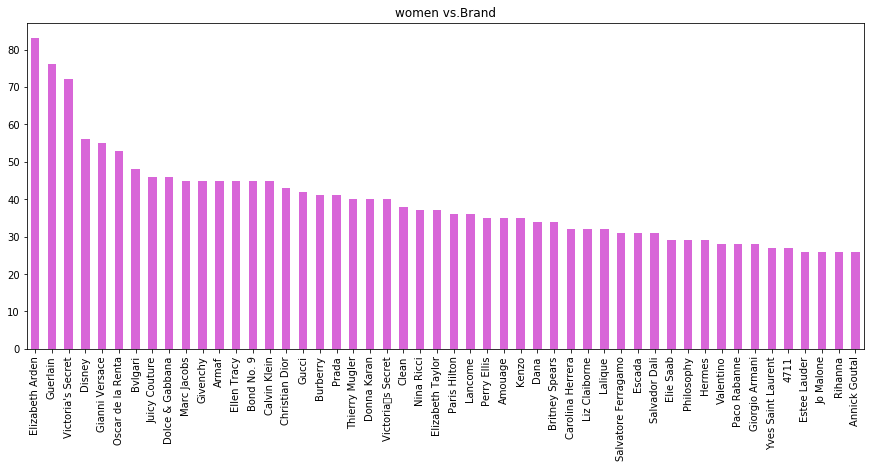

In [0]:
perfume['Brand'][(perfume['Gender']== u'women')].value_counts(ascending=False)[0:50].sort_values(ascending=False).plot(kind='bar', color='m', figsize=(15,6), alpha=.6)
plt.title(u'women vs.Brand');

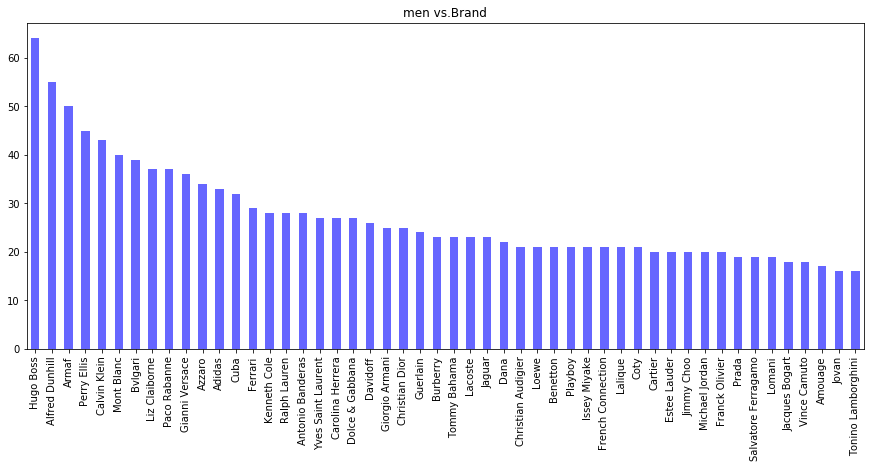

In [0]:
perfume['Brand'][(perfume['Gender']== u'men')].value_counts(ascending=False)[0:50].sort_values(ascending=False).plot(kind='bar', color='b', figsize=(15,6), alpha=.6)
plt.title(u'men vs.Brand');

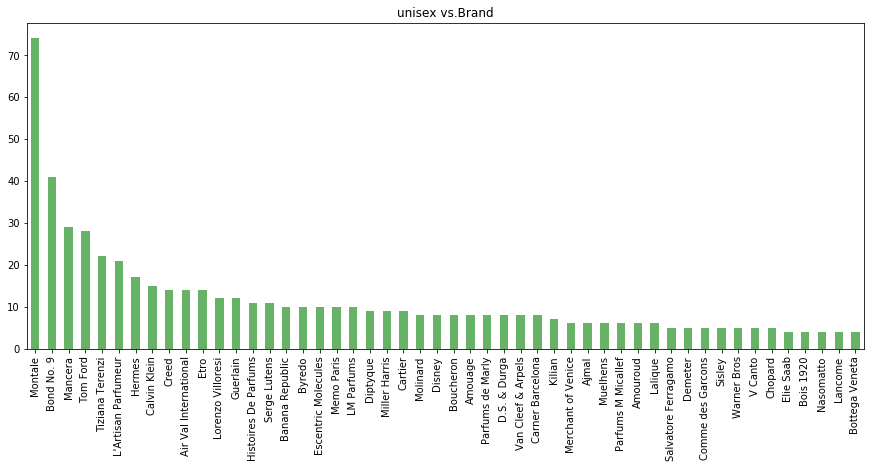

In [0]:
perfume['Brand'][(perfume['Gender']== u'unisex')].value_counts(ascending=False)[0:50].sort_values(ascending=False).plot(kind='bar', color='g', figsize=(15,6), alpha=.6)
plt.title(u'unisex vs.Brand');

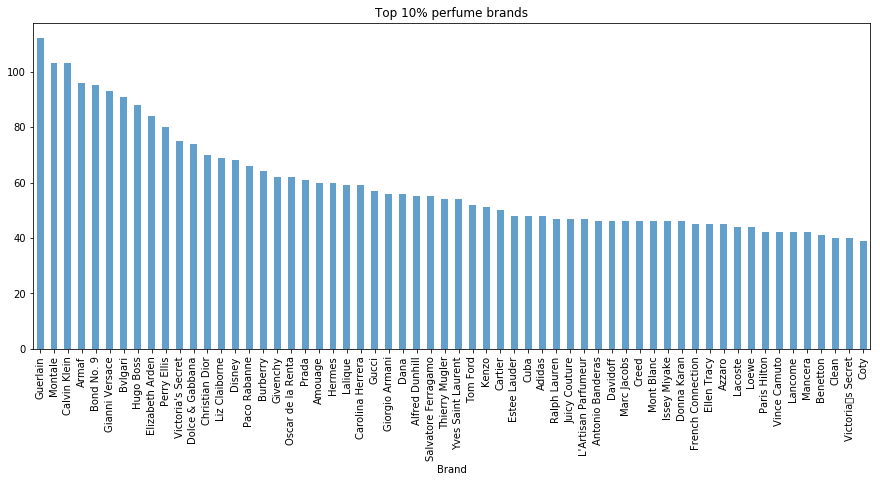

In [0]:
# brand vs. number of perfumes
perfume.groupby('Brand')['Id'].count().sort_values(ascending=False)[0:60].plot(kind='bar', alpha=.7, figsize=(15,6));
plt.title(u'Top 10% perfume brands');

**Working with perfume names and notes.**


*   First get a dataframe of names and notes.
*   Build a model that gives you information about which perfume holds which      notes.


*   
*   







In [0]:
Perfume1 = pd.DataFrame(perfume,columns=['Name','Notes'])
Perfume1


,Name,Notes
0,D & G Light Blue,"Apple, Cedar, Bellflower, Sicilian lemon, Whit..."
1,Acqua Di Gio,"Orange, Lime, Jasmine, Bergamot, Neroli"
2,Cool Water,"Rosemary, Mint, Sandalwood, Lavender, Cedar"
3,Viva La Juicy,"Mandarin orange, Wild berries, Honeysuckle, Ga..."
4,Eternity,"Lavender, Mandarin orange, Bergamot, Lemon, Co..."
...,...,...
8322,Mexx Xx Nice,NaN
8323,Miami Seduction,NaN
8324,Miracle Secret,NaN
8325,Miss Soprani,NaN


In [0]:
Perfume2 = Perfume1.dropna()
print('Number of perfumes after removing perfumes that does not have notes:' )
Perfume2

Number of perfumes after removing perfumes that does not have notes:


,Name,Notes
0,D & G Light Blue,"Apple, Cedar, Bellflower, Sicilian lemon, Whit..."
1,Acqua Di Gio,"Orange, Lime, Jasmine, Bergamot, Neroli"
2,Cool Water,"Rosemary, Mint, Sandalwood, Lavender, Cedar"
3,Viva La Juicy,"Mandarin orange, Wild berries, Honeysuckle, Ga..."
4,Eternity,"Lavender, Mandarin orange, Bergamot, Lemon, Co..."
...,...,...
8305,Mat Chocolat,"Black currant, Grapefruit, Watermelon, Rose, D..."
8306,Matthew Williamson,"lime, bergamot, tagete, neroli, cinnamon, ging..."
8307,Max Mara,"ginger, magnolia, citrus, lily, orchid, musk, ..."
8308,Mcm Gold,"Watermelon, Passion Fruit, Vanilla And Honey."


In [0]:
Perfume3 = pd.DataFrame(Perfume2,columns=['Name'])
Perfume3


,Name
0,D & G Light Blue
1,Acqua Di Gio
2,Cool Water
3,Viva La Juicy
4,Eternity
...,...
8305,Mat Chocolat
8306,Matthew Williamson
8307,Max Mara
8308,Mcm Gold


In [0]:
new_df = pd.DataFrame(Perfume2.Notes.str.split(',').tolist(), index=Perfume3.Name).stack()
new_df = new_df.reset_index([0, 'Name'])
new_df.columns = ['Name', 'Notes']
new_df


,Name,Notes
0,D & G Light Blue,Apple
1,D & G Light Blue,Cedar
2,D & G Light Blue,Bellflower
3,D & G Light Blue,Sicilian lemon
4,D & G Light Blue,White rose
...,...,...
27010,Missoni,Bergamot
27011,Missoni,Italian lemon
27012,Missoni,Citron
27013,Missoni,Pear


In [0]:

df = pd.DataFrame( index=Perfume3['Name'],columns=new_df['Notes'])

# df.to_csv('/content/drive/My Drive/Perfume Dataset/output.csv', encoding='utf-8', index=False)
df
df = perfume[perfume['Name'].str.contains['Notes']]
df


TypeError: ignored

In [0]:
Perfume1 = perfume[perfume['Name'].str.contains("D & G Light Blue") & perfume['Notes'].str.contains('Apple, Cedar, Bellflower, Sicilian lemon, White rose') & perfume['Category'].str.contains('eau de toilette')]
Perfume1

In [0]:
export_csv = df.to_csv (r'/content/drive/My Drive/Perfume Dataset/export_csv.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

KeyboardInterrupt: ignored

In [0]:
Perfume1 = perfume[perfume['Name'].str.contains("D & G Light Blue") & perfume['Notes'].str.contains('Apple, Cedar, Bellflower, Sicilian lemon, White rose') & perfume['Category'].str.contains('eau de toilette')]
Perfume1

,Id,Brand,Category,Name,Rating,Gender,Notes,Recommended Time,Year,Perfume url
0,1,Dolce & Gabbana,eau de toilette,D & G Light Blue,4.847,women,"Apple, Cedar, Bellflower, Sicilian lemon, Whit...",casual,2001,https://www.fragrancenet.com/perfume/dolce-and...
551,552,Dolce & Gabbana,eau de toilette spray 3.3 oz & body cream 3.3 ...,D & G Light Blue,5.000,women,"Apple, Cedar, Bellflower, Sicilian lemon, Whit...",casual,2001,https://www.fragrancenet.com/perfume/dolce-and...
1698,1699,Dolce & Gabbana,eau de toilette spray 3.4 oz & body cream 3.3 ...,D & G Light Blue,NaN,women,"Apple, Cedar, Bellflower, Sicilian lemon, Whit...",casual,2001,https://www.fragrancenet.com/perfume/dolce-and...
1882,1883,Dolce & Gabbana,eau de toilette spray 3.4 oz & body cream 3.3 ...,D & G Light Blue,NaN,women,"Apple, Cedar, Bellflower, Sicilian lemon, Whit...",casual,2001,https://www.fragrancenet.com/perfume/dolce-and...
2546,2547,Dolce & Gabbana,eau de toilette spray 3.3 oz & body cream 3.3 ...,D & G Light Blue,NaN,women,"Apple, Cedar, Bellflower, Sicilian lemon, Whit...",casual,2001,https://www.fragrancenet.com/perfume/dolce-and...
4044,4045,Dolce & Gabbana,eau de toilette spray 3.4 oz & eau de toilette...,D & G Light Blue,NaN,women,"Apple, Cedar, Bellflower, Sicilian lemon, Whit...",casual,2001,https://www.fragrancenet.com/perfume/dolce-and...


In [0]:
#  uniqueValues = Perfume1['Notes'].unique()
 

# print(uniqueValues)

# Perfume1.composers.str.split('\s+').str[0]
Perfume1['Notes'].str.split(',', expand=True)
# Perfume1 = Perfume1.set_index('Name') 
  
# Perfume1




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Name,,,,,,,,,,,,,,,,,,,,,
D & G Light Blue,Apple,Cedar,Bellflower,Sicilian lemon,White rose,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Acqua Di Gio,Orange,Lime,Jasmine,Bergamot,Neroli,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Cool Water,Rosemary,Mint,Sandalwood,Lavender,Cedar,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Viva La Juicy,Mandarin orange,Wild berries,Honeysuckle,Gardenia,Jasmine,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Eternity,Lavender,Mandarin orange,Bergamot,Lemon,Coriander,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat Chocolat,Black currant,Grapefruit,Watermelon,Rose,Dark chocolate,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
Matthew Williamson,lime,bergamot,tagete,neroli,cinnamon,ginger,benzoin,jasmine sambac,schinus molle,ylang ylang,magnolia,orris concrete,gardenia,rose,sandalwood,vanilla,olibanum,labdanum,patchouli,musk,heliotrope
Max Mara,ginger,magnolia,citrus,lily,orchid,musk,and sugar.,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
ab = pd.read_csv('/content/drive/My Drive/Perfume Dataset/export_csv.csv', sep=',', error_bad_lines = False, encoding="latin-1")
ab

FileNotFoundError: ignored